# TOC:
* [Simple Sine Wave Graph](#sine)
* [Subplots](#subplots)
* [Interactive Graph With ipywidgets](#ipyw)
* [Graphing with Pandas](#pandas)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [67]:
# Display Graphs within the notebook
%matplotlib inline

sns.set_palette('deep')


# Initialize a figure for our graphs for better visibility
f = plt.Figure(figsize=(10,6))

# Simple Sine Wave Graph <a class="anchor" id="sine"/>

RuntimeError: Can not put single artist in more than one figure

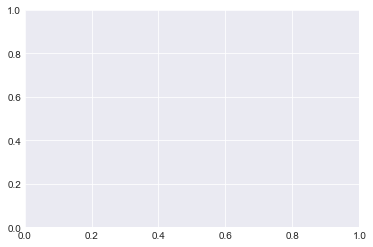

In [69]:
freq = 1.0 # Frequency
x = np.arange(0.0, 1.0, 0.01) # Min, Max, Step
y = [np.sin(2 * np.pi * freq * i) for i in x]

plt.plot(x,y,figure=f)
plt.show()

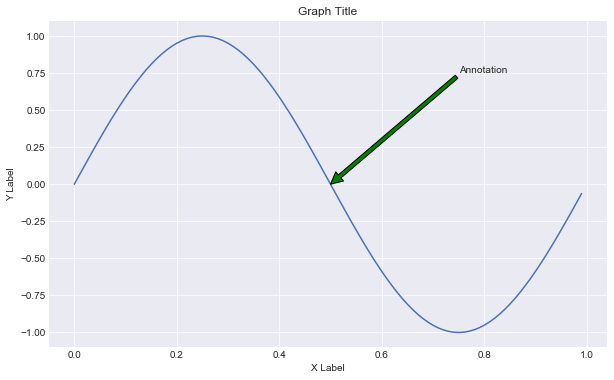

In [66]:
_ = plt.figure(figsize=(10,6))
ax = plt.subplot(1,1,1)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Graph Title')
plt.plot(x,y)
ax.annotate('Annotation', xy=(0.5, 0.0), xytext=(0.75, 0.75),
            arrowprops={'facecolor':'green'},
            )
plt.show()

# Subplots <a class="anchor" id="subplots"/>

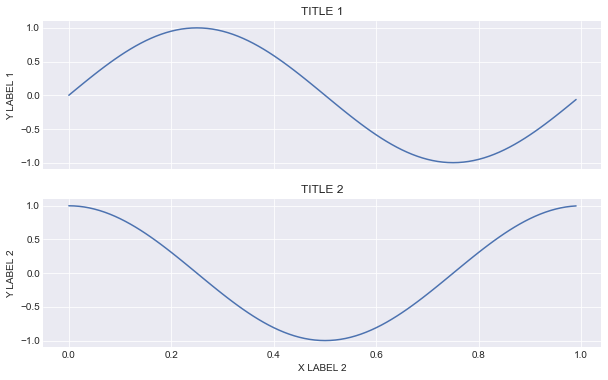

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,6))
y = [np.sin(2 * np.pi * freq * i) for i in x]
axes[0].plot(x,y)
y = [np.cos(2 * np.pi * freq * i) for i in x]
axes[1].plot(x,y)
axes[0].set_title('TITLE 1')
axes[1].set_title('TITLE 2')
axes[1].set_xlabel('X LABEL 2')
axes[0].set_ylabel('Y LABEL 1')
axes[1].set_ylabel('Y LABEL 2')
plt.show()

# Interactive Graph with ipywidgets <a class="anchor" id="ipyw"/>

In [6]:
from ipywidgets import interact, interactive, fixed, IntSlider, Dropdown

In [45]:
def display_graph(func, freq=1.0):
    x = np.arange(0.0, 1.0, 0.01) # Min, Max, Step
    y = [func(2 * np.pi * freq * i) for i in x]
    plt.plot(x,y,figsize=(10,6))
    plt.show()

In [60]:
dd = Dropdown(options={'Sine':np.sin,'Cosine':np.cos})
fs = IntSlider(min=1, max=10, step=1, continuous_update=False)
_ = interact(display_graph, func=dd, freq=fs)

A Jupyter Widget

# Graphing with Pandas <a class="anchor" id="pandas"/>

In [9]:
import seaborn as sns
iris = sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


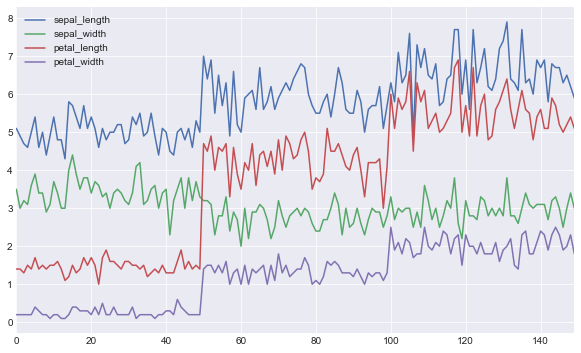

In [58]:
iris.plot(figsize=(10,6))

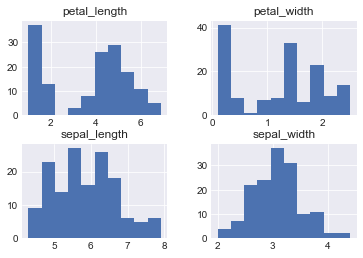

In [56]:
_ = plt.figure(figsize=(10,6))
_ = iris.hist()

# Seaborn
*If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.*

These include:
- Using default themes that are aesthetically pleasing ("pretty")
- Setting and using custom color pallete
- Making attractive statistical plots

API Reference:
http://seaborn.pydata.org/api.html

Seaborn is a **complement**, not a substitute for Matplotlib. Some tweaks to visualizations still require Matplotlib.



### Pair Plots
Allows us to compare all combinations  separate features / attributes within a DataFrame by utilizing scatter plots.

Across the diagonal are histograms of each feature.

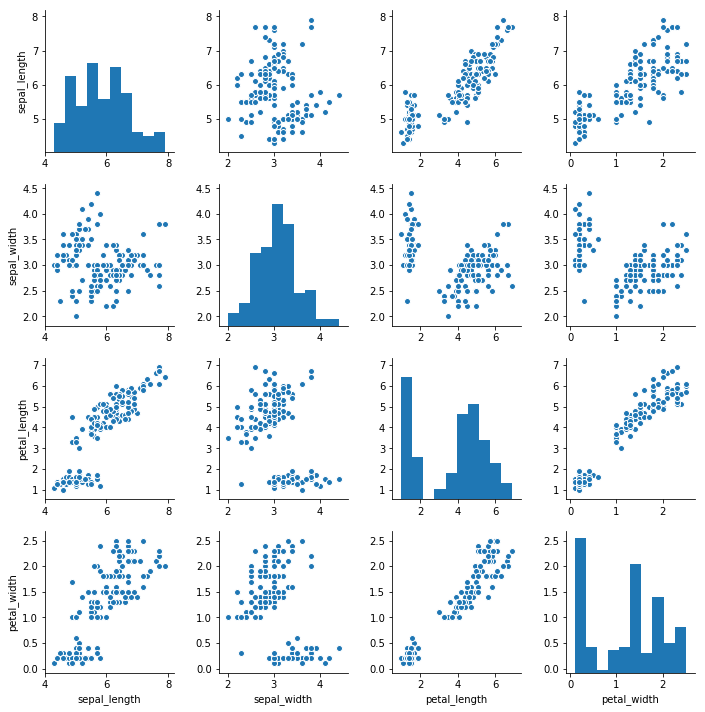

In [35]:
sns.pairplot(iris)

In [ ]:
sns

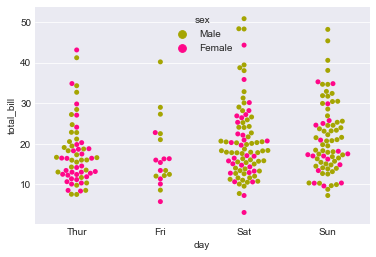

In [33]:
tips = sns.load_dataset('tips')

colors = ['puke', 'strong pink'] # http://xkcd.com/color/rgb/
pal = sns.xkcd_palette(colors)
sns.set_palette(pal)

sns.swarmplot(data=tips, x="day", y="total_bill", hue="sex")

## Pokemon Example

In [16]:
df = pd.read_csv('data/Pokemon.csv', index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### Scatter Plots

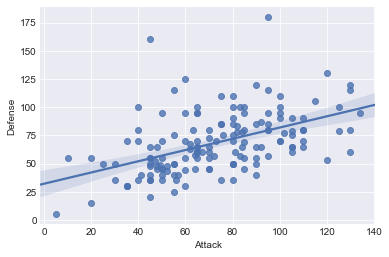

In [86]:
sns.regplot(x='Attack', y='Defense', data=df)

Seaborn doesn't have a a specific scatter plot function so instead we're can utilize the lmplot or regplot function and pass in the *fit_reg=False* argument to remove the linear regression lines giving us a scatter plot. 

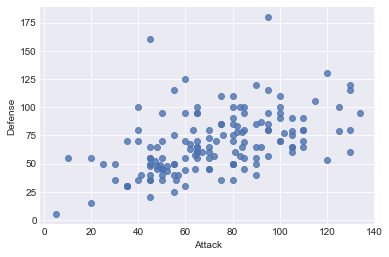

In [85]:
sns.regplot(x='Attack', y='Defense', data=df, fit_reg=False)

We can even add hues to the scatterplot to color based on another feature.

(0, 141.9881096001028)

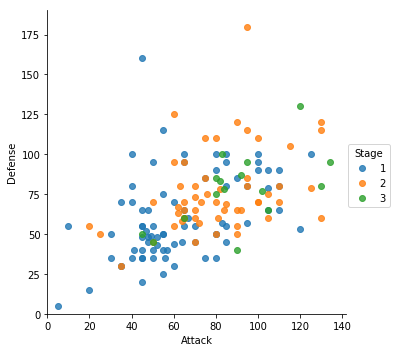

In [19]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

### Boxplots (Box and Whisker Plots)
Creates a graph showing boxes with lines extending out from the boxes ("whiskers"). The box represents the quartiles (25th, 50th/median and 75th). The whiskers extend out by default to 1.5 * IQR (Interquartile Range -- 75th-25th)

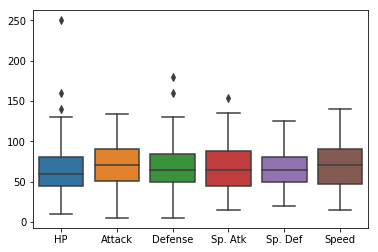

In [20]:
# Only use the features we're interested in and drop the rest
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_df)


### Violin Plots
- They look like violins
- Good alternative to box plots
- Where boxplots only show summary statistics, violin plots additionally show distribution in the thickness of the violin

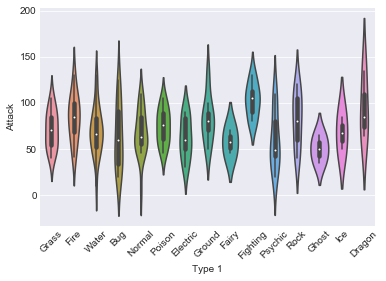

In [27]:
# Set theme
sns.set_style('darkgrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)
_ = plt.xticks(rotation=45)

This graph is nice but it would be easier to relate to each violin if the color reflected the type (for example Green for Grass). Luckily Seaborn allows us to define a customized palette to use.

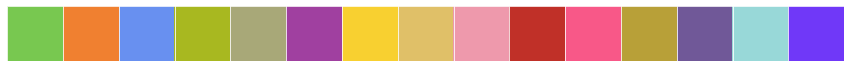

In [50]:
pokemon_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# Let's visualize our newly customized color palette.
sns.palplot(pokemon_type_colors)

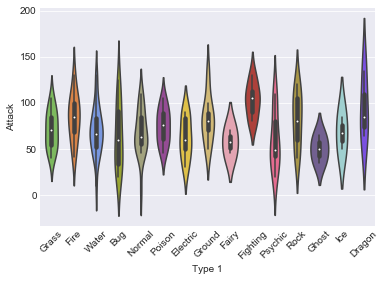

In [53]:
g = sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pokemon_type_colors) # Set color palette
_ = plt.xticks(rotation=45) # rotate x-axis labels - Improve readability

Violin plots are good for showing a general overview of a dataset especially if there's a large amount of data. In this case since we only have 151 data points we could utilize a swamplot to get a more detailed picture. Even better would be to overlay a swarmplot on top of the violin plot.

Text(0.5,1,'Attack by Type')

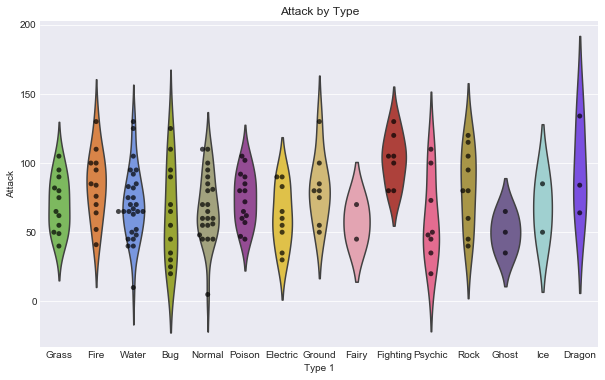

In [35]:
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pokemon_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

## Other Types of Graphs
### Heatmap
Helps you visualize matrix-like data

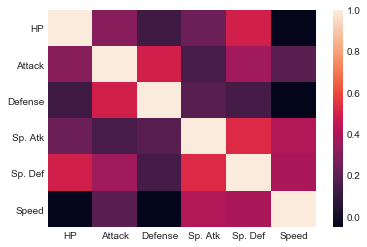

In [70]:
corr = stats_df.corr() # Get correlation data
sns.heatmap(corr)

### Histogram
Plot the distribution of numeric features broken down in different bins

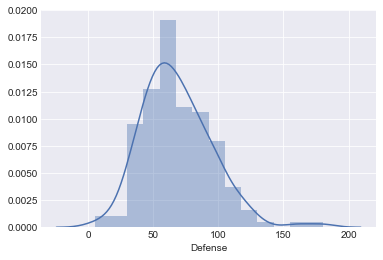

In [71]:
sns.distplot(df['Defense'])

### Bar Plot (Count Plot)
Visualize the distributions of categorical features

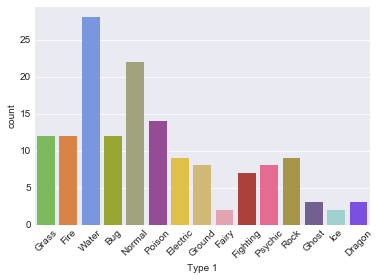

In [74]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
_ = plt.xticks(rotation=45) # Rotate to improve readability

### Density Plot
Displays the distribution between two features. Also helpful when overlayed with a scatter plot.

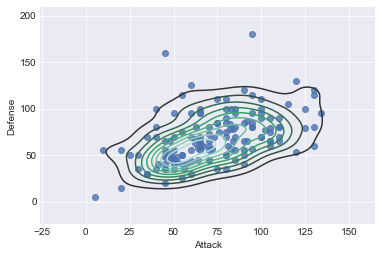

In [82]:
fig, ax = plt.subplots()
sns.kdeplot(df['Attack'], df['Defense'], ax=ax)
sns.regplot(x='Attack', y='Defense', data=df, fit_reg=False, ax=ax)